# Statistics and Probability for Data Sciences - Challenges 
# Project 2

In [25]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.proportion as prop
from sklearn.linear_model import LinearRegression
from pandas.core.common import SettingWithCopyWarning
from scipy import stats

## 1.Display the data of white wine and red wine

In [26]:
red=pd.read_csv(".\winequality-red.csv",delimiter=';')
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [27]:
white=pd.read_csv(".\winequality-white.csv",delimiter=';')
white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## 2.Get the size of both white wine and red wine.

In [28]:
print("\n------------- WHITE WINE -------------\n")
print("Number of rows :", white.shape[0])
print("Number of columns:", white.shape[1])
print("\n-------------- RED WINE --------------\n")
print("Number of rows :", red.shape[0])
print("Number of columns:", red.shape[1])


------------- WHITE WINE -------------

Number of rows : 4898
Number of columns: 12

-------------- RED WINE --------------

Number of rows : 1599
Number of columns: 12


## 3.Get the number of null in both type of wines

In [29]:
print("\n------------- WHITE WINE -------------\n")
print(white.isnull().sum())
print("\n-------------- RED WINE --------------\n")
print(red.isnull().sum())


------------- WHITE WINE -------------

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

-------------- RED WINE --------------

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


## 4.Check for duplicates and remove them in both type of wine data

In [30]:
print("\n------------- WHITE WINE -------------\n")
print("No of rows duplicated:",white.duplicated().sum())
print("Total no of rows:",len(white))
white = white.drop_duplicates()
print("Total no of rows after removing duplicate rows:",len(white))
print("\n-------------- RED WINE --------------\n")
print("No of rows duplicated:",red.duplicated().sum())
print("Total no of rows:",len(red))
red = red.drop_duplicates()
print("Total no of rows after removing duplicate rows:",len(red))


------------- WHITE WINE -------------

No of rows duplicated: 937
Total no of rows: 4898
Total no of rows after removing duplicate rows: 3961

-------------- RED WINE --------------

No of rows duplicated: 240
Total no of rows: 1599
Total no of rows after removing duplicate rows: 1359


## 5.Get the number of uniques values in all Feature and print them

In [31]:
print("\n------------- WHITE WINE -------------\n")
for column in white.columns:
    print("No of Unique values in", column, ":", white[column].nunique())
print("\n-------------- RED WINE --------------\n")
for column in red.columns:
    print("No of Unique values in", column, ":", red[column].nunique())


------------- WHITE WINE -------------

No of Unique values in fixed acidity : 68
No of Unique values in volatile acidity : 125
No of Unique values in citric acid : 87
No of Unique values in residual sugar : 310
No of Unique values in chlorides : 160
No of Unique values in free sulfur dioxide : 132
No of Unique values in total sulfur dioxide : 251
No of Unique values in density : 890
No of Unique values in pH : 103
No of Unique values in sulphates : 79
No of Unique values in alcohol : 103
No of Unique values in quality : 7

-------------- RED WINE --------------

No of Unique values in fixed acidity : 96
No of Unique values in volatile acidity : 143
No of Unique values in citric acid : 80
No of Unique values in residual sugar : 91
No of Unique values in chlorides : 153
No of Unique values in free sulfur dioxide : 60
No of Unique values in total sulfur dioxide : 144
No of Unique values in density : 436
No of Unique values in pH : 89
No of Unique values in sulphates : 96
No of Unique va

## 6.Print the mean density of both the sets

In [32]:
print("Mean density of White wine :",white['density'].mean())
print("Mean density of Red wine :",red['density'].mean())

Mean density of White wine : 0.9937895304216049
Mean density of Red wine : 0.9967089477557026


## 7.Combine both the datasets with color of the wine in column

In [33]:
# Add a new column for color
white['color'] = 0
red['color'] = 1
# This will show warning for adding the new column 
warnings.filterwarnings('ignore', category=SettingWithCopyWarning)
# Concatenate both the dataframes
df = pd.concat([white, red], ignore_index=True)
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1
5316,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
5317,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
5318,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


## 8.Remove the null values if any

In [34]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64


There is no null value 
## 9.Remove the outliers if any

In [35]:
print("Total no of rows:",len(df))
# Calculate z-scores for each column
z_scores = stats.zscore(df)

# Find rows with at least one outlier
outliers = np.where(np.abs(z_scores) > 3)[0]

# Remove the outliers
df = df.drop(outliers)
print("Total no of rows after removing outliers rows:",len(df))

Total no of rows: 5320
Total no of rows after removing outliers rows: 4869


## 10.Do wines with higher alcohol content receive better ratings?

In [36]:
correlation = df['alcohol'].corr(df['quality'])
print('Correlation between alcohol content and quality:', correlation)

Correlation between alcohol content and quality: 0.4843522307963148


The correlation coefficient is positive, it means that as alcohol content increases, the quality rating tends to increase

## 11.Find correlation between citric acid content and PH.

In [37]:
correlation = df['citric acid'].corr(df['pH'])
print('Correlation between citric acid and pH:', correlation)

Correlation between citric acid and pH: -0.3087421215850128


If the correlation coefficient between citric acid content and pH is negative, that indicates a negative correlation between the two variables. In other words, as the citric acid content increases, the pH tends to decrease.

## 12.Find regression of PH on citric acid

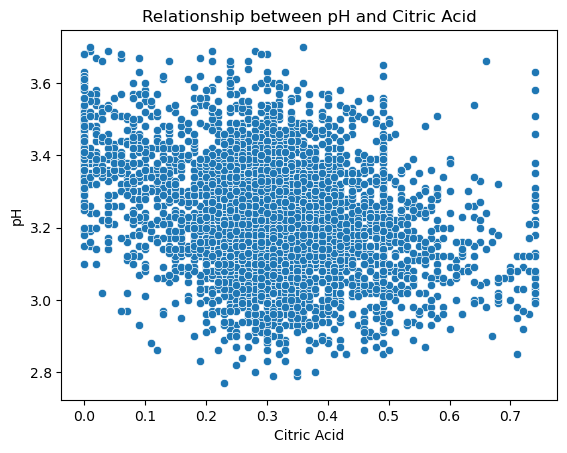

Intercept: 3.334680804014977
Coefficient: -0.35109342871487775


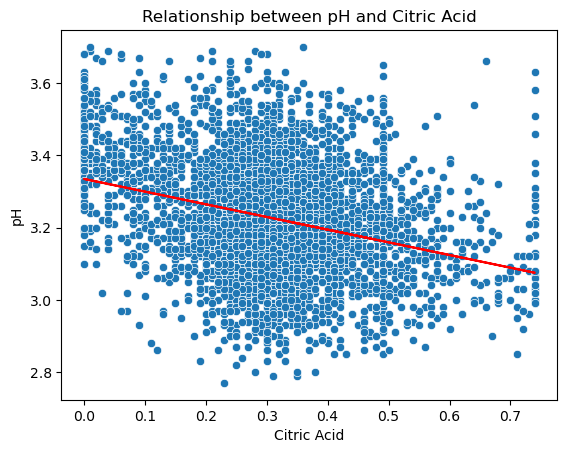

In [38]:
sns.scatterplot(x='citric acid', y='pH', data=df)
plt.title('Relationship between pH and Citric Acid')
plt.xlabel('Citric Acid')
plt.ylabel('pH')
plt.show()

X = df[['citric acid']]
y = df['pH']

model = LinearRegression()
model.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_[0])

sns.scatterplot(x='citric acid', y='pH', data=df)
plt.title('Relationship between pH and Citric Acid')
plt.xlabel('Citric Acid')
plt.ylabel('pH')

# Plot the regression line
plt.plot(X, model.predict(X), color='red')

plt.show()

## 13.Find how many variables are independent

To determine how many variables are independent in this dataset, we can use the correlation matrix and calculate the number of variables that have a correlation coefficient below a certain threshold (e.g., 0.7).

In [39]:
# Calculate the correlation matrix
corr_matrix = df.corr().abs()

# Set the threshold for correlation coefficient
threshold = 0.7

# Find the number of variables that are independent
independent_vars = np.where(np.triu(corr_matrix > threshold, k=1))
num_independent_vars = len(set(independent_vars[0]))

print(f"The number of independent variables is {num_independent_vars}.")


The number of independent variables is 2.


## 14.Create a new column as the acidity level. Divide the existing data into 5 groups based on the acidity level. The levels are to be named ['High', 'Moderately_High', 'Medium', 'Low']. Acidity may be obtained from the PH.

In [40]:
bins = [0, 3.2, 3.4, 3.6, 3.8, 14]

# define the labels for the acidity levels
labels = ['Very low', 'Low', 'Medium', 'Moderately High', 'High']

# create the new column for acidity level
df['acidity level'] = pd.cut(df['pH'], bins=bins, labels=labels)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity level
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0,Low
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0,Low
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0,Very low
4,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,0,Very low
5,8.1,0.220,0.43,1.5,0.044,28.0,129.0,0.99380,3.22,0.45,11.0,6,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1,Medium
5316,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1,Medium
5317,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1,Medium
5318,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1,Medium


## 15.Find the mean quality of each acidity level with groupby. Use groupby

In [41]:
mean_quality = df.groupby("acidity level")["quality"].mean()

print(mean_quality)

acidity level
Very low           5.773263
Low                5.875632
Medium             5.894454
Moderately High    5.558140
High                    NaN
Name: quality, dtype: float64


## 16.Is a certain type of wine (red or white) associated with higher quality?

In [42]:
print("0 = white , 1 =red ")
color_quality = df.groupby("color")["quality"].mean()
print(color_quality)

0 = white , 1 =red 
color
0    5.877875
1    5.649171
Name: quality, dtype: float64


From the output, you can see that the mean quality score for color 0 (white) is slightly higher than color 1 (red). However, the difference is very small and may not be statistically significant. Therefore, it's difficult to say that a certain type of color is associated with higher quality based on this data alone.

## 17.Select samples with alcohol content less than the median

In [43]:
median_alcohol = df['alcohol'].median()
low_alcohol = df[df['alcohol'] < median_alcohol]
low_alcohol

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity level
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0,Low
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0,Low
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0,Very low
4,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,0,Very low
7,8.6,0.230,0.40,4.2,0.035,17.0,109.0,0.99470,3.14,0.53,9.7,5,0,Very low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5295,7.3,0.690,0.32,2.2,0.069,35.0,104.0,0.99632,3.33,0.51,9.5,5,1,Low
5305,6.2,0.460,0.29,2.1,0.074,32.0,98.0,0.99578,3.33,0.62,9.8,5,1,Low
5311,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5,1,Low
5315,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1,Medium


## 18.Get the quality rating for the low alcohol and high alcohol groups.

In [44]:
low_alcohol = df[df['alcohol'] < 10.5]
low_quality = low_alcohol['quality'].mean()
print(f"The average quality rating for the low alcohol group is: {low_quality:.2f}")
high_alcohol = df[df['alcohol'] >= 10.5]
high_quality = high_alcohol['quality'].mean()
print(f"The average quality rating for the high alcohol group is: {high_quality:.2f}")

The average quality rating for the low alcohol group is: 5.48
The average quality rating for the high alcohol group is: 6.19


## 19.Do sweeter wines get more ratings?

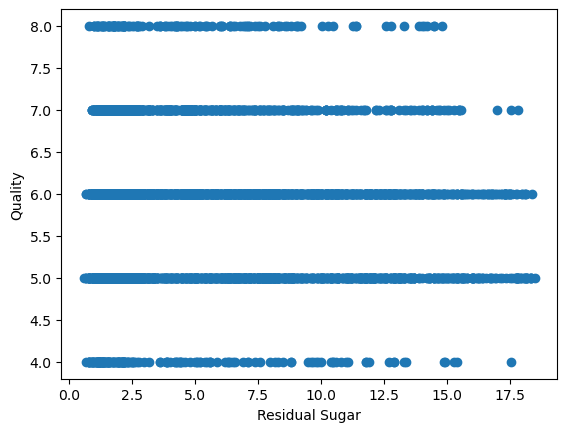

In [45]:
plt.scatter(df['residual sugar'], df['quality'])
plt.xlabel('Residual Sugar')
plt.ylabel('Quality')
plt.show()

The scatter plot show whether there is a trend between residual sugar and quality. If sweeter wines get more ratings, we would expect to see a positive correlation between residual sugar and quality but here almost the values are same

## 20.Get the number of counts based on ratings and color of wine.

In [46]:
count_ratings_color = df.groupby(['quality', 'color']).size()
print(count_ratings_color)

quality  color
4        0         144
         1          32
5        0        1111
         1         474
6        0        1720
         1         435
7        0         679
         1         133
8        0         129
         1          12
dtype: int64


## 21.Is the density of red wine and white wine similar?

In [47]:
print("0 = white , 1 =red ")
color_quality = df.groupby("color")["density"].mean()
print(color_quality)

0 = white , 1 =red 
color
0    0.993687
1    0.996441
Name: density, dtype: float64


yes almost same

## 22.Is the confidence interval for the differences of the proportion of white wine with rating 3 and the proportion of red wine with rating 3.

Yes, the confidence interval for the difference of proportions of color 0 wine with rating 3 and the proportion of color 1 wine with rating 3 can be calculated

In [48]:
rating_3 = df[df['quality'] == 3]

prop_white = rating_3[rating_3['color'] == 0].shape[0] / rating_3.shape[0]
prop_red = rating_3[rating_3['color'] == 1].shape[0] / rating_3.shape[0]

conf_int = prop.confint_proportions_2indep(prop_white * rating_3.shape[0], 
                                           rating_3.shape[0], 
                                           prop_red * rating_3.shape[0], 
                                           rating_3.shape[0], 
                                           method='wald')

print('Confidence interval for difference of proportions: ', conf_int)


ZeroDivisionError: division by zero